In [66]:
import matplotlib.pyplot as plt
import numpy as np

# Parameter plots

In [67]:
# Translations
min_b = 0.01
max_b = 0.07
num_t = 200

beta = np.linspace(min_b, max_b, num_t)
alpha = 1 - beta
bar_alpha = np.cumprod(alpha)

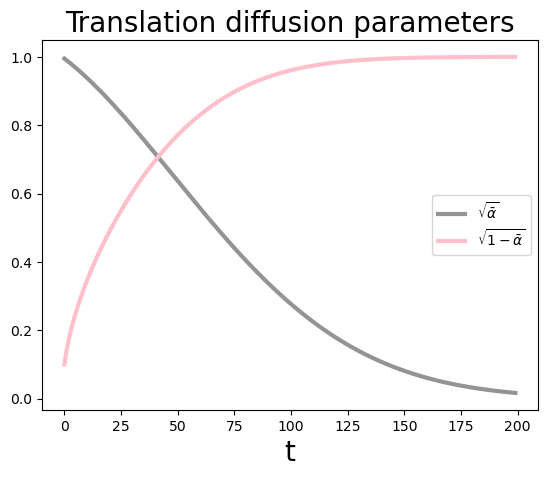

In [81]:

plt.plot(np.sqrt(bar_alpha), label=r'$\sqrt{\bar{\alpha}}$', color='#929591', linewidth=3)
plt.plot(np.sqrt(1 - bar_alpha), label=r'$\sqrt{1 - \bar{\alpha}}$', color='#FFC0CB', linewidth=3)
# plt.plot(np.sqrt(bar_alpha), label=r'$$\sqrt{\bar{\alpha}}$$')
plt.legend()
plt.title('Translation diffusion parameters', fontsize=20)
plt.xlabel('t', fontsize=20)
plt.set_cmap('Pastel1')


In [58]:
# Rotations

# Rotations: IGSO3, min_b=1.5,max_b=2.5,min_sigma=0.02,max_sigma=1.5
min_sigma = 1.5
max_sigma = 2.5
min_b = 1.5
max_b = 2.5
ts = np.linspace(0.0, 1.0, num_t)
sigma = min_sigma + ts*min_b  + (1/2)*(ts**2)*(max_b - min_b)

Text(0.5, 0, 't')

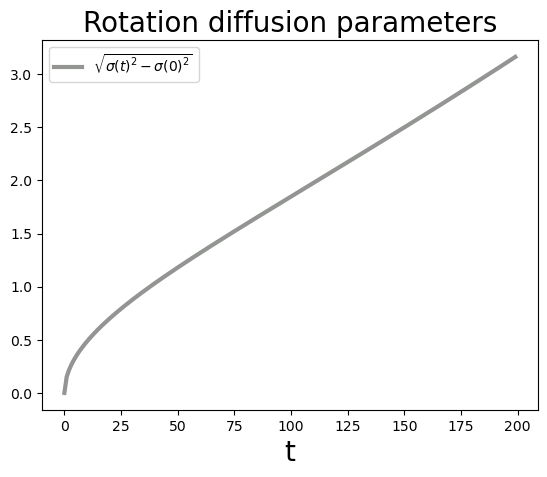

In [82]:
plt.plot(np.sqrt(sigma**2 - sigma[0]**2), label=r'$\sqrt{\sigma(t)^2 - \sigma(0)^2}$', color='#929591', linewidth=3)
plt.legend()
plt.title('Rotation diffusion parameters', fontsize=20)
plt.xlabel('t', fontsize=20)

# Wasserstein plot

In [90]:
from scipy.stats import wasserstein_distance as wd

In [102]:
# Translations
min_b = 0.01
max_b = 0.07
num_t = 200

beta = np.linspace(min_b, max_b, num_t)
alpha = 1 - beta
bar_alpha = np.cumprod(alpha)

mu_s = np.sqrt(bar_alpha)
trans_std_s = np.sqrt(1 - bar_alpha)

In [103]:
# Rotations

# Rotations: IGSO3, min_b=1.5,max_b=2.5,min_sigma=0.02,max_sigma=1.5
min_sigma = 1.5
max_sigma = 2.5
min_b = 1.5
max_b = 2.5
ts = np.linspace(0.0, 1.0, num_t)
sigma = min_sigma + ts*min_b  + (1/2)*(ts**2)*(max_b - min_b)

In [104]:
n_samples = 1000
x_0 = np.zeros((n_samples, 3))
x_T = np.random.normal(size=(n_samples, 3))
x_T_norm = np.linalg.norm(x_T, axis=-1)

all_trans_wd = []
all_rot_wd = []
for i,t in enumerate(ts):
    x_t = np.random.normal(scale=std_s[i], size=(n_samples, 3))
    x_t_norm = np.linalg.norm(x_t, axis=-1)
    wd_t = wd(x_t_norm, x_T_norm)
    all_trans_wd.append(wd_t)
    
    x_t = np.random.normal(scale=sigma[i], size=(n_samples, 3))
    x_t_norm = np.linalg.norm(x_t, axis=-1)
    wd_t = wd(x_t_norm, x_T_norm)
    all_rot_wd.append(wd_t)

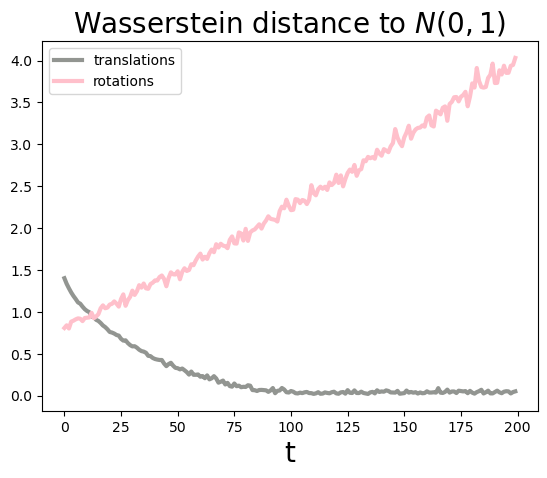

In [107]:

plt.plot(all_trans_wd, color='#929591', linewidth=3, label='translations')
plt.plot(all_rot_wd, color='#FFC0CB', linewidth=3, label='rotations')
# plt.plot(np.sqrt(1 - bar_alpha), label=r'$\sqrt{1 - \bar{\alpha}}$', color='#FFC0CB', linewidth=3)
# plt.plot(np.sqrt(bar_alpha), label=r'$$\sqrt{\bar{\alpha}}$$')
plt.legend()
plt.title(f'Wasserstein distance to $N(0, 1)$', fontsize=20)
plt.xlabel('t', fontsize=20)
plt.set_cmap('Pastel1')


In [ ]:
def wd_schedule(schedule):
    conf = base_conf()
    diff_conf = conf.diffuser
    diff_conf.trans_schedule = schedule
    exp = train_se3_diffusion.Experiment(conf=conf)
    train_loader, train_sampler, valid_loader, valid_sampler = exp.create_digs_dataset(0, 1)
    r3_diff = exp.diffuser._r3_diffuser
    
    x_0 = np.zeros((n_samples, 3))
    x_1 = r3_diff.sample_ref(n_samples=n_samples)
    x_1_norm = np.linalg.norm(x_1, axis=-1)
    all_trans_wd = []
    for i,t in enumerate(forward_t):
        x_t, _ = r3_diff.forward_marginal(x_0, t, score_norm=False)
        x_t_norm = np.linalg.norm(x_t, axis=-1)
        wd_t = wd(x_t_norm, x_1_norm)
        all_trans_wd.append(wd_t)
    return all_trans_wd

In [ ]:

# plt.plot(np.sqrt(bar_alpha), label=r'$\sqrt{\bar{\alpha}}$', color='#929591', linewidth=3)
# plt.plot(np.sqrt(1 - bar_alpha), label=r'$\sqrt{1 - \bar{\alpha}}$', color='#FFC0CB', linewidth=3)
# plt.plot(np.sqrt(bar_alpha), label=r'$$\sqrt{\bar{\alpha}}$$')
plt.legend()
plt.title('Translation diffusion parameters', fontsize=20)
plt.xlabel('t', fontsize=20)
plt.set_cmap('Pastel1')
